# Modelo de Ising - Estimativa de Grandezas Termodin√¢micas - Parte 2  
**Aluno: Jo√£o Victor Campos** 

---

Os valores de energia por spin e magnetiza√ß√£o por spin s√£o obtidos ao dividir o valor m√©dio calculado para energia e magnetiza√ß√£o
pelo n√∫mero de spins da rede.

In [2]:
from  Ising_Utils import *
from typing import Tuple

\begin{align}
c_v = \frac{\beta ^2}{N} \left( \left <E^2\right> - \left<E\right>^2  \right) \\
\chi = \frac{\beta}{N} \left( \left <M^2\right> - \left<M\right>^2  \right)
\end{align}

In [3]:
@jit(nopython=True)
def rms(Vec):
    N = len(Vec)
    
    Vec_mean = np.mean(Vec)
    Vec_square_mean = np.mean(Vec*Vec)

    # M_mean = np.mean(Energy_Vec)
    # M_square_mean = np.mean(Mag_vec* Mag_vec) 
    
    root_ms =  (Vec_square_mean - Vec_mean**2)

    return root_ms

In [4]:
# Par√¢metero Globais
TEMPERATURAS = [2.0, 2.1 , 2.2, 2.3 , 2.4, 2.5 , 2.6 , 2.7 , 2.8, 2.9, 3.0]
# TEMPERATURAS = [2.0, 2.2, 2.4, 2.6 ,2.8, 3.0]

NUM_CAIXAS = 10
L_REDE = [20, 30, 40, 50]
# L_REDE = [18]


CV_CONTAINTER = []
CV_ERROS = []

CHI_CONTAINER = []
CHI_ERROS = []

ENERGY_CONTAINER = []
ENERGY_ERROS = []

MAG_CONTAINER = []
MAG_ERROS = []

MONTE_CARLO_STEPS = 110_000


In [5]:
for L in L_REDE:
    print("-" * 100)
    print(f"Tamahno da rede = {L}")
    for T in TEMPERATURAS:
        print(f"\tTemperatura = {T} ")
        Rede = SpinLattice( L=L, T=T, spins=random_config(L*L) )
        ex = create_exp_dict(Rede.beta)

        ener, mag = get_ener_mag(spins= Rede.spins, viz=Rede.get_viz())

        energias = np.empty(MONTE_CARLO_STEPS)
        mags = np.empty(MONTE_CARLO_STEPS)

        for i in range(MONTE_CARLO_STEPS):
            s, ener, mag = monte_carlo_step(S=Rede.spins, viz=Rede.get_viz(),
                                            ex=ex,ener=ener, mag=mag)
            energias[i] = ener
            mags[i] = mag       # Slice dentro do mesmo tamanho L    
        energias = energias[10_000:]
        mags = mags[10_000:]

        # Armazenar os valores de cada caixa
        cv_is = np.empty(NUM_CAIXAS)
        chi_is = np.empty(NUM_CAIXAS)
    
        mag_is = np.empty(NUM_CAIXAS)
        E_is = np.empty(NUM_CAIXAS)
        
        m = len(energias) / NUM_CAIXAS
        
        # Metodo das Caixas
        for k in range(NUM_CAIXAS):
            
            E_i = energias[ int(m * (k)) : int( m * (k+1) )]
            mag_i = mags[ int(m * (k)) : int( m * (k+1) ) ] 

            
            # adiciona aos array
            cv_is[k] = (Rede.beta**2 / m) * rms(E_i)
            chi_is[k] = (Rede.beta / m) * rms(mag_i)
            E_is[k] = np.sum(E_i) / m
            mag_is[k] = abs( sum( mags[int(m * (k)): int(m * (k+1))] ) ) / m
        
        # A adicionar ao CONTAINER
        CV_medio, CV_erro = np.mean(cv_is), np.std(cv_is)
        CHI_medio, CHI_erro = np.mean(chi_is), np.std(chi_is)
        E_medio, E_erro = np.mean(E_is) , np.std(E_is)
        MAG_medio, MAG_erro = np.mean(mag_is) , np.std(mag_is)

        CV_CONTAINTER.append(CV_medio)
        CV_ERROS.append(CV_erro)

        CHI_CONTAINER.append(CHI_medio)
        CHI_ERROS.append(CHI_erro)

        ENERGY_CONTAINER.append(E_medio)
        ENERGY_ERROS.append(E_erro)

        MAG_CONTAINER.append(MAG_medio)
        MAG_ERROS.append(MAG_erro)

print("RODOU")


    



----------------------------------------------------------------------------------------------------
Tamahno da rede = 20
	Temperatura = 2.0 
	Temperatura = 2.1 
	Temperatura = 2.2 
	Temperatura = 2.3 
	Temperatura = 2.4 
	Temperatura = 2.5 
	Temperatura = 2.6 
	Temperatura = 2.7 
	Temperatura = 2.8 
	Temperatura = 2.9 
	Temperatura = 3.0 
----------------------------------------------------------------------------------------------------
Tamahno da rede = 30
	Temperatura = 2.0 
	Temperatura = 2.1 
	Temperatura = 2.2 
	Temperatura = 2.3 
	Temperatura = 2.4 
	Temperatura = 2.5 
	Temperatura = 2.6 
	Temperatura = 2.7 
	Temperatura = 2.8 
	Temperatura = 2.9 
	Temperatura = 3.0 
----------------------------------------------------------------------------------------------------
Tamahno da rede = 40
	Temperatura = 2.0 
	Temperatura = 2.1 
	Temperatura = 2.2 
	Temperatura = 2.3 
	Temperatura = 2.4 
	Temperatura = 2.5 
	Temperatura = 2.6 
	Temperatura = 2.7 
	Temperatura = 2.8 
	Temperatura =

In [6]:
num_redes = len(L_REDE)

# Calor Especifico
Cv_rede = np.array_split(CV_CONTAINTER, num_redes)
Cv_erro = np.array_split(CV_ERROS, num_redes)
# Susceptibilidade
Chi_rede = np.array_split(CHI_CONTAINER, num_redes)
Chi_erro = np.array_split(CHI_ERROS, num_redes)
# Magnetizacao
Mag_rede = np.array_split(MAG_CONTAINER, num_redes)
Mag_erro = np.array_split(MAG_ERROS, num_redes)
# Energia por spin
Energia_rede = np.array_split(ENERGY_CONTAINER, num_redes)
Energia_erro = np.array_split(ENERGY_ERROS, num_redes)


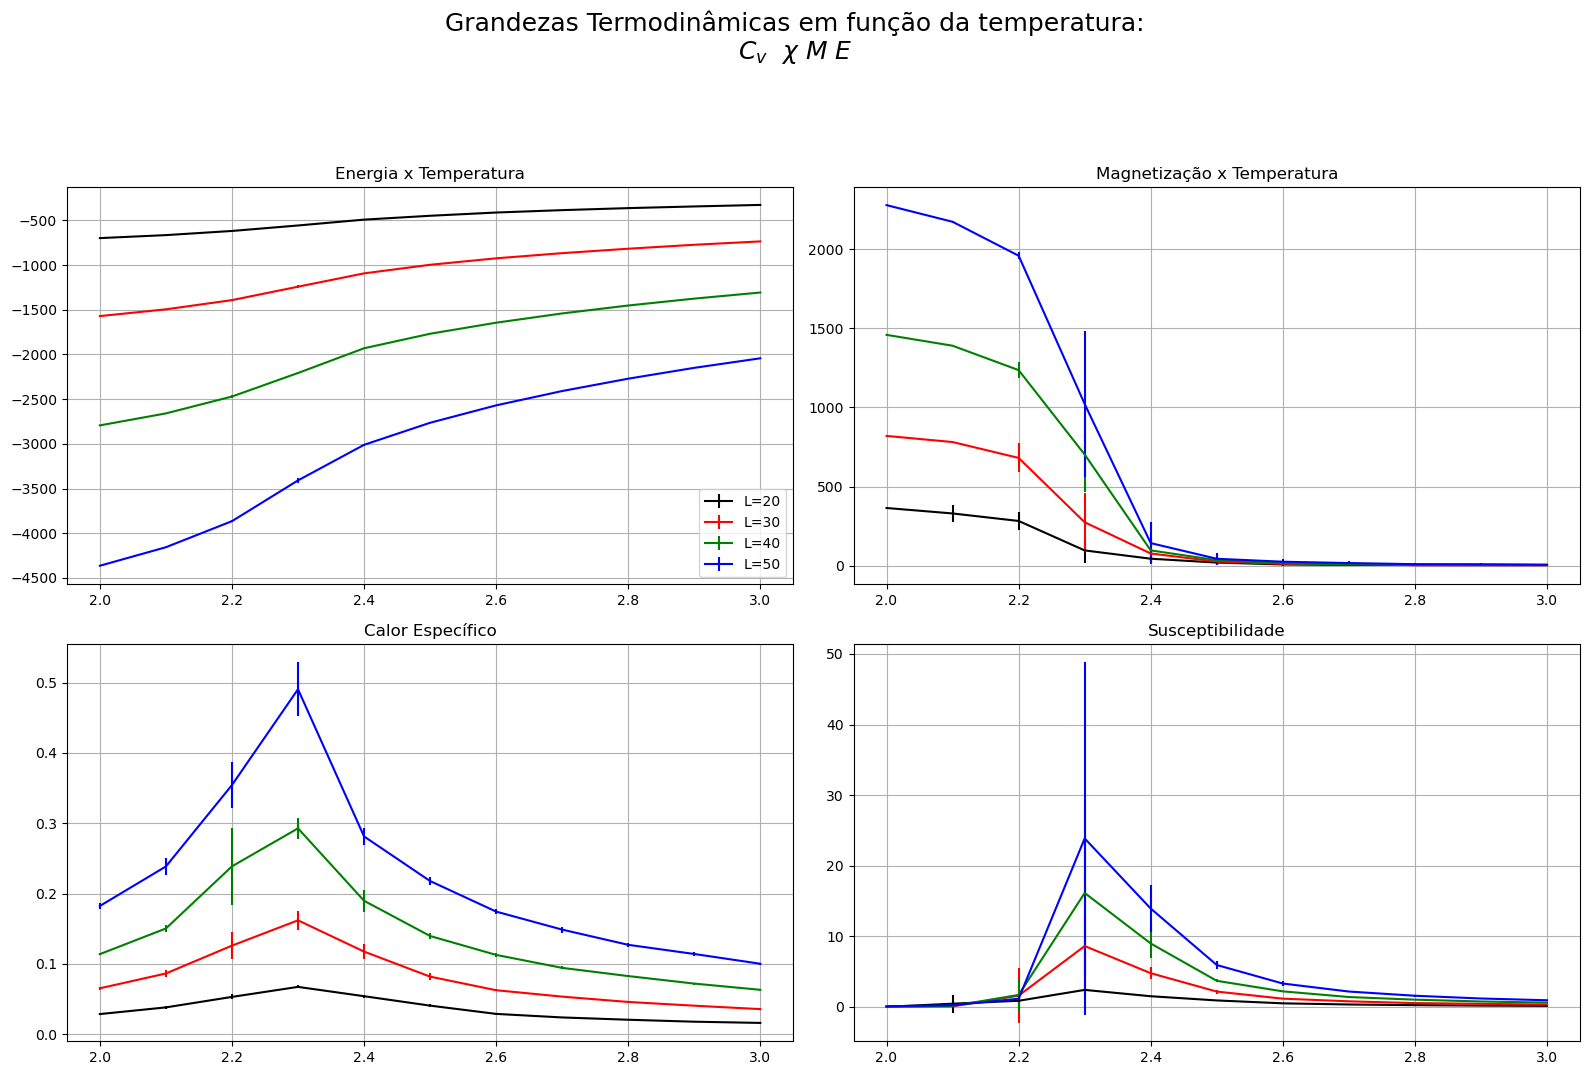

In [7]:
fig, (ax_up, ax_down) = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle('Grandezas Termodin√¢micas em fun√ß√£o da temperatura:\n' + r"$C_v$  $\chi$ $M$ $E$", y=1.07, size=18);

c = ["black", "red", "green", "blue"]

ax_up[0].set_title("Energia x Temperatura") ; ax_up[0].grid() 
ax_up[1].set_title("Magnetiza√ß√£o x Temperatura") ;  ax_up[1].grid() 
ax_down[0].set_title("Calor Espec√≠fico") ; ax_down[0].grid() 
ax_down[1].set_title("Susceptibilidade") ; ax_down[1].grid()

# Plot energias
for i in range(num_redes):
    ax_up[0].errorbar(TEMPERATURAS, Energia_rede[i], Energia_erro[i], color=c[i], label=f"L={L_REDE[i]}")
    ax_up[0].legend()

# Plot Mag
for i in range(num_redes):
    ax_up[1].errorbar(TEMPERATURAS, Mag_rede[i], Mag_erro[i], color=c[i], label=f"L={L_REDE[i]}")   

# Plot Calor Especifico
for i in range(num_redes):
    ax_down[0].errorbar(TEMPERATURAS, Cv_rede[i], Cv_erro[i], color=c[i], label=f"L={L_REDE[i]}")     

# Plot Susceptibilidade
for i in range(num_redes):
    ax_down[1].errorbar(TEMPERATURAS, Chi_rede[i], Chi_erro[i], color=c[i], label=f"L={L_REDE[i]}")   




fig.tight_layout()

## Respostas √†s perguntas da atividade

### 1 - Quais crit√©rios voc√™ utilizou para escolher os valores dos par√¢metros descritos acima?  

**Resposta:**  
J√° havia feito uma atividade semelhante, ent√£o sabia quais tamanhos de rede seriam interessantes trabalhar, bem como a faixa de temperatura.

### 2 -  Descreva o comportamento observado para as principais grandezas termodin√¢micas ‚Äì Energia por spin, Magnetiza√ß√£o por spin, calor espec√≠fico e susceptibilidade magn√©tica ‚Äì em fun√ß√£o da temperatura. Ou seja, ao variar a temperatura, o que acontece com o valor destas grandezas? Quais s√£o os limites para baixas e altas temperaturas? H√° algum pico ou vale? O comportamento est√° em acordo com o que voc√™ esperava?

**Resposta:**  
A energia por spin m√©dia √© maior (menos negativa) para tamanhos de redes maiores. A magnetiza√ß√£o por spin vai a 0 para temperaturas muito altas, isso deve significar a perda do car√°ter ferromagn√©tico ap√≥s o ponto de Curie. O calor espec√≠fico para rede menores √© tamb√©m menor, aumenta at√© determinada temperatura, satura, e depois diminui. O comportamento da susceptibilidade √© semelhante.  

### 3 - Ao variar o tamanho do sistema, como as curvas destas grandezas em fun√ß√£o da temperatura se modifica? H√° algum intervalo de temperaturas no qual as grandezas s√£o independentes do tamanho do sistema? Em regi√µes onde h√° varia√ß√£o com o tamanho do sistema, como a grandeza √© modificada quando $ùêø$ aumenta?

**Resposta:**
A partir do $T > 2.6$,  $C_v, \chi, \mathcal{M}$ s√£o independentes do tamanho do sistema e v√£o um valor constante (ou nulo).  

### 4 - Como √© o comportamento dos erros estat√≠sticos √† medida que a temperatura varia? Tem algum valor de temperatura em torno do qual os erros s√£o maiores? Voc√™ enxerga algum motivo para isso? Os erros estat√≠sticos dependem do tamanho do sistema? Como?  

**Resposta**:  
 O erro estat√≠stico √© tanto maior quanto maior o sistema, bem como quanto mais pr√≥ximo da temperatura de transi√ß√£o de fase que ocorre por volta de $T=2.3$.

### 5 - Com base no comportamento encontrado, identifique poss√≠veis fases do sistema, descrevendo as principais caracter√≠sticas das fases encontradas.  

**Resposta**:
Muito provavelmente uma fase ferromagn√©tica com um valor de magnetiza√ß√£o n√£o nulo e um fase paramagn√©tica ap√≥s a transi√ß√£o de fase.

### 6 - Estime, utilizando os dados das suas simula√ß√µes, a temperatura de transi√ß√£o de fase do sistema no limite termodin√¢mico, i.e., para o limite em que o tamanho do sistema √© infinito.  

**Resposta:**  

Com o tamanho do sistema indo para infinito, a curva estreitaria em valores pr√≥ximos a $T=2.3$ onde haveria uma descontinuidade das grandezas termodin√¢micas.

